# 代码测试

In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from image_predict import img_to_tsne, convert_image_to_mnist_format
from find_nearest_point import find_nearest_point

In [2]:
clustered_data = joblib.load('data/clustered_data/mapped_labels.pkl')

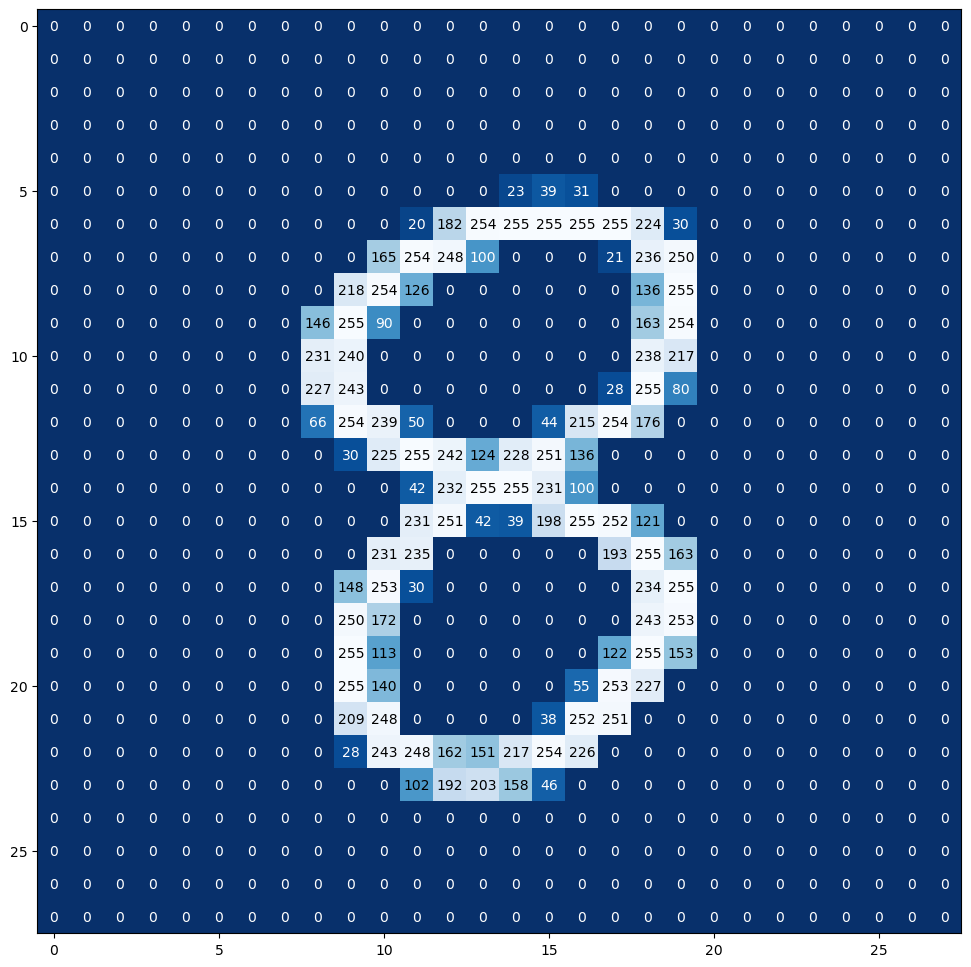

In [3]:
example = convert_image_to_mnist_format('picture/example8.png', label=8)
img = example.drop(columns='label', axis=1).to_numpy().reshape(28, 28)
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
plt.savefig('picture/mnist_example8.png', dpi=300, bbox_inches='tight')

In [4]:
import pandas as pd
mnist_train = pd.read_csv('data/mnist_train.csv', low_memory = False)
mnist_test = pd.read_csv('data/mnist_test.csv', low_memory = False)
tsne_df = pd.read_csv('data/tsne_df.csv', low_memory = False)
X_train = mnist_train.drop(columns = 'label', axis = 1)
y_train = mnist_train['label']

In [5]:
example_tsne, example_similar_index = img_to_tsne(img, X_train, tsne_df)
print(f'example tsne: {example_tsne}')
print(f'Example similar index: {example_similar_index}')

example tsne: [ 2.74436426 26.28857231]
Example similar index: 4176


新数据点: 2.7443642616271973
最近的训练点: [ 2.74436426 26.28857231]
该点的标签: 8
距离: 0.0000


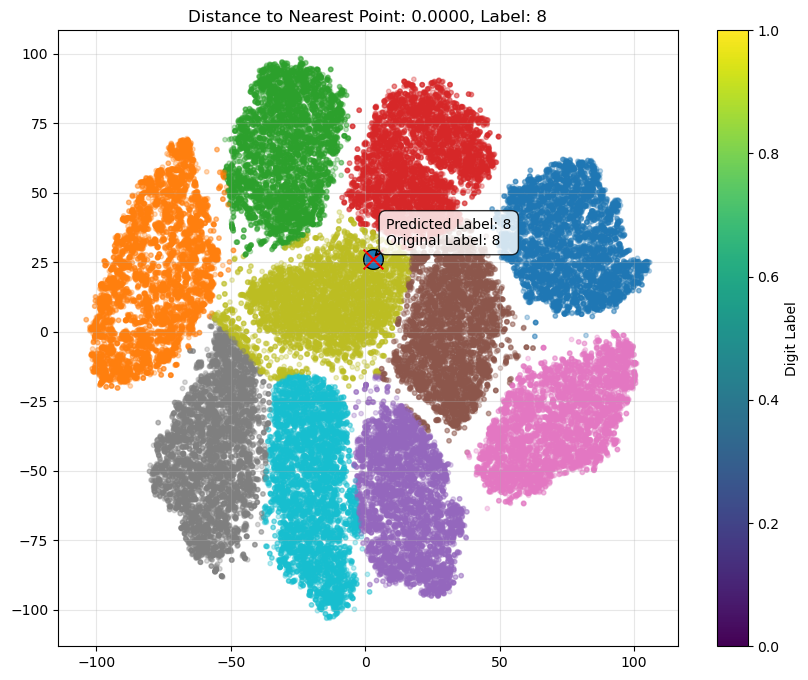

In [6]:
# 新数据点
X = tsne_df[['x', 'y']].values
# 使用我们创建的函数
nearest_point, nearest_label, distance = find_nearest_point(example_tsne, X, clustered_data)

print(f"新数据点: {example_tsne[0]}")
print(f"最近的训练点: {nearest_point}")
print(f"该点的标签: {nearest_label}")
print(f"距离: {distance:.4f}")

# 可视化结果
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustered_data, cmap='tab10', alpha=0.3, s=10)
plt.scatter(nearest_point[0], nearest_point[1], c=nearest_label, cmap='tab10', s=200, edgecolors='black')
plt.scatter(example_tsne[0], example_tsne[1], c='red', marker='x', s=200)

# 绘制连接线
plt.plot([example_tsne[0], nearest_point[0]], [example_tsne[1], nearest_point[1]], 'k--')

plt.annotate(f"Predicted Label: {nearest_label}\nOriginal Label: {example['label'].values[0]}",
             xy=(example_tsne[0], example_tsne[1]), 
             xytext=(example_tsne[0] + 5, example_tsne[1] + 5),
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.title(f'Distance to Nearest Point: {distance:.4f}, Label: {nearest_label}')
plt.colorbar(label='Digit Label')
plt.grid(True, alpha=0.3)
plt.savefig('picture/nearest_point_example8.png', dpi=300, bbox_inches='tight')
plt.show()